# Inter-relationships in a Matrix
## Display relationships with a Chord Diagram using the circlize package
### Converted to a Jupyter format from http://www.r-bloggers.com/inter-relationships-in-a-matrix/ 
### Original blog post by Arthur Charpentier
#### Tested in R version 3.2.2, Jupyter 4.1.0

### Function to load libraries

In [1]:
# Usage, arg is a string: load_package('circlize') 

load_package = function (pkg) {
    if (! pkg %in% row.names(installed.packages())) {
        install.packages(pkg, repos='http://cran.us.r-project.org')
    }

    require(pkg, character.only = T)
    print(pkg %in% row.names(installed.packages()))  # Print true if loaded
}
       

### Read data source into base

In [2]:
base = read.csv(url("http://www.data.gouv.fr/s/resources/base-de-donnees-accidents-corporels-de-la-circulation-sur-6-annees/20150806-153355/vehicules_2014.csv"))
head(base)

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
1,2.014e+11,0,33,0,0,2,1,1,A01
2,2.014e+11,0,7,0,0,0,6,15,B02
3,2.014e+11,0,7,0,1,0,7,13,A01
4,2.014e+11,0,2,0,0,2,1,1,A01
5,2.014e+11,0,7,0,0,2,7,15,B02
6,2.014e+11,0,7,0,0,2,1,13,A01


In [3]:
T=table(base$Num_Acc)  # Num_Acc is a claim number
idx=names(T)[which(T==2)]  # get the two vehicle claims
head(idx)
length(idx)
head(T)  # Formatting by displaying the whole dataframe does not display Num_Acc well

[1] "201400000001" "201400000003" "201400000004" "201400000005" "201400000006"
[6] "201400000009"

[1] 32222

201400000001 201400000002 201400000003 201400000004 201400000005 201400000006 
           2            1            2            2            2            2

In [4]:
B=base[base$Num_Acc %in% idx,]  # Base subsetted by two vehicle claims
head(B)

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
1,2.014e+11,0,33,0,0,2,1,1,A01
2,2.014e+11,0,7,0,0,0,6,15,B02
4,2.014e+11,0,2,0,0,2,1,1,A01
5,2.014e+11,0,7,0,0,2,7,15,B02
6,2.014e+11,0,7,0,0,2,1,13,A01
7,2.014e+11,0,38,0,0,2,1,0,B02


In [5]:
load_package('circlize')

Warning message:
In if (!character.only) package <- as.character(substitute(package)): the condition has length > 1 and only the first element will be usedLoading required package: circlize


[1] TRUE


### Show distinct values of the choc variable, which is the damaged region of the vehicle

In [6]:
unique(B$choc)

[1]  1  6  7  2  5  3  4  8  9  0 NA

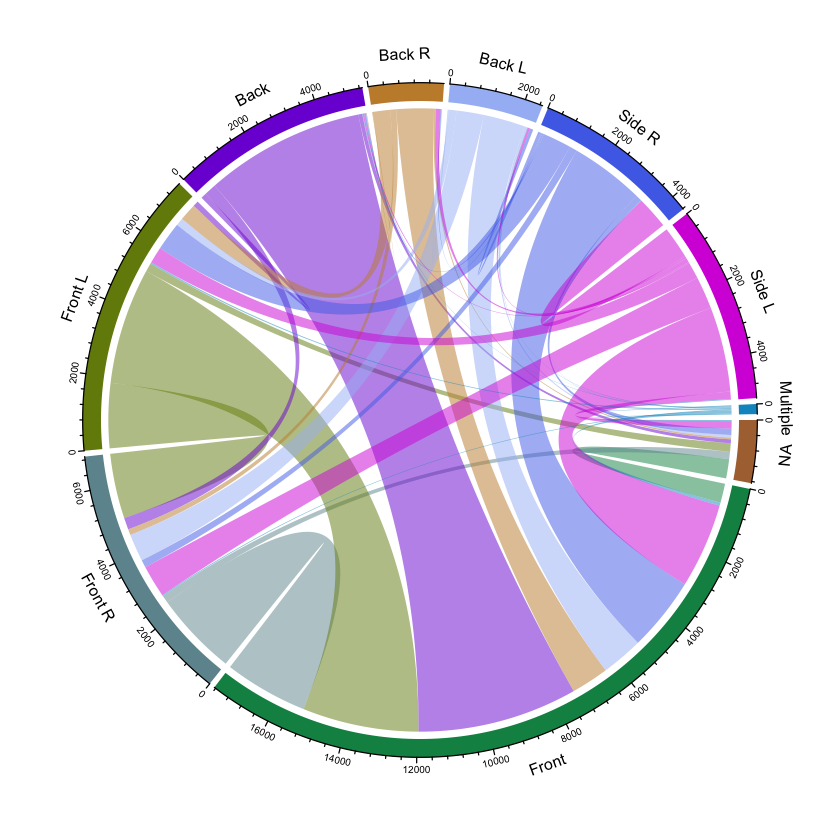

In [7]:
nom=c("NA","Front","Front R",'Front L',"Back","Back R","Back L","Side R","Side L","Multiple")
# Now, we simply have to go through our dataset, and get the matrix. My first idea was to get a symmetric one,

B=base[base$Num_Acc %in% idx,]  
B=B[order(B$Num_Acc),]
M=matrix(0,10,10)

for(i in seq(1,nrow(B),by=2)){
   a=B$choc[i]+1
   b=B$choc[i+1]+1
   M[a,b]=M[a,b]+1
   M[b,a]=M[b,a]+1
 }

rownames(M)=nom
colnames(M)=nom

# The problem, when we ask for a symmetric chord diagram, is that we cannot have Front – Front claims (since values on the diagonal are removed)
chordDiagramFromMatrix(M, symmetric=TRUE)

### Display matrix of claim counts

In [8]:
M

,NA,Front,Front R,Front L,Back,Back R,Back L,Side R,Side L,Multiple
NA,1706,545,209,240,110,50,73,178,211,31
Front,545,5750,2382,3302,4544,1067,1192,2105,2416,87
Front R,209,2382,506,1843,337,168,781,217,920,30
Front L,240,3302,1843,2370,162,492,219,810,467,42
Back,110,4544,337,162,138,17,9,51,36,16
Back R,50,1067,168,492,17,52,22,25,126,5
Back L,73,1192,781,219,9,22,82,98,62,15
Side R,178,2105,217,810,51,25,98,136,918,15
Side L,211,2416,920,467,36,126,62,918,326,22
Multiple,31,87,30,42,16,5,15,15,22,12


In [9]:
?chordDiagramFromMatrix

chordDiagramFromMatrix {circlize},R Documentation
mat,A table which represents as a numeric matrix.
grid.col,"Grid colors which correspond to matrix rows/columns (or sectors). The length of the vector should be either 1 or length(union(rownames(mat), colnames(mat))). It's preferred that grid.col is a named vector of which names correspond to sectors. If it is not a named vector, the order of grid.col corresponds to order of sectors."
grid.border,"border for grids. If it is NULL, the border color is same as grid color"
transparency,"Transparency of link colors, 0 means no transparency and 1 means full transparency. If transparency is already set in col or row.col or column.col, this argument will be ignored. NAalso ignores this argument."
col,"Colors for links. It can be a matrix which corresponds to mat, or a function which generate colors according to values in mat, or a single value which means colors for all links are the same, or a three-column data frame in which the first two columns correspond to row names and columns and the third column is colors. You may use colorRamp2 to generate a function which maps values to colors."
row.col,Colors for links. Links from the same row in mat will have the same color. Length should be same as number of rows in mat. This argument only works when col is set to NULL.
column.col,Colors for links. Links from the same column in mat will have the same color. Length should be same as number of columns in mat. This argument only works when col and row.col is set to NULL.
order,"Order of sectors. Default order is union(df[[1]], df[[2]])."
directional,"Whether links have directions. 1 means the direction is from the first column in df to the second column, -1 is the reverse, 0 is no direction, and 2 for two directional. Same setting as link.border."
direction.type,"type for representing directions. Can be one or two values in ""diffHeight"" and ""arrows"". If the value contains ""diffHeight"", different heights of the links are used to represent the directions for which starting root has long height to give people feeling that something is comming out. If the value contains ""arrows"", users can customize arrows with following arguments. Same setting as link.border. Note if you want to set both diffHeight and arrows for certain links, you need to embed these two options into one string such as ""diffHeight+arrows""."


### Recompute and display plot which includes front-front claims

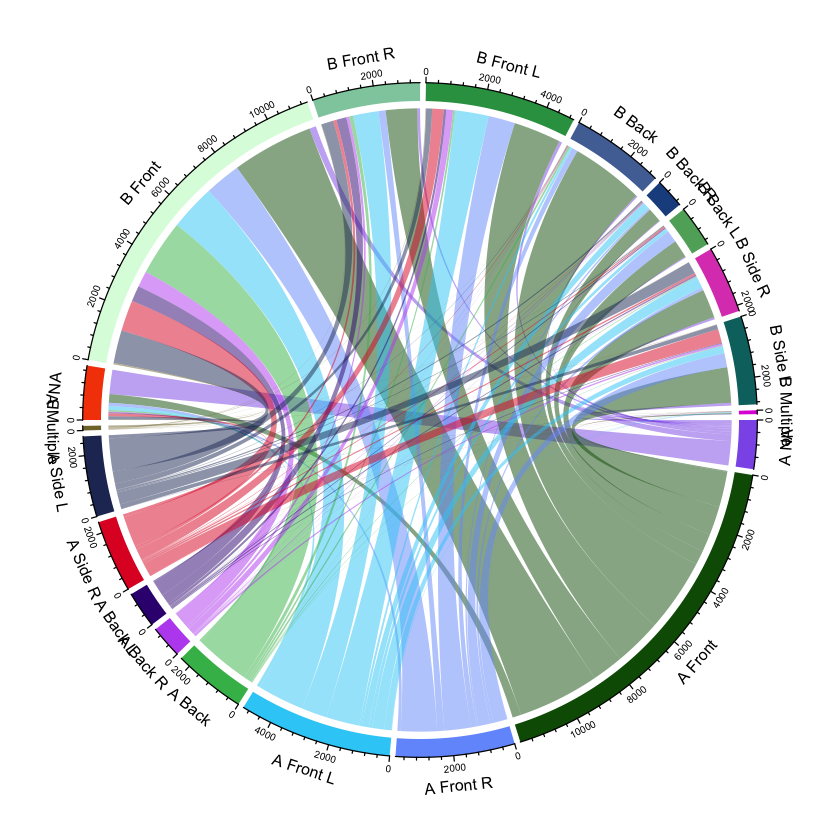

In [10]:
circos.clear()
M=matrix(0,10,10)

for(i in seq(1,nrow(B),by=2)){
   a=B$choc[i]+1
   b=B$choc[i+1]+1
 M[a,b]=M[a,b]+1
 }

rownames(M)=paste("A",nom,sep=" ")
colnames(M)=paste("B",nom,sep=" ")

chordDiagram(M)